In [1]:
import gzip
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
MERGEDTAGSCOMM = 'finalgamingtagcomment.parquet'


In [3]:
merged_commtags = pd.read_parquet(MERGEDTAGSCOMM)
merged_commtags.head()

,author,display_id,likes,replies,tags,upload_date
0,2,9pQILRT42Cg,0,0,"faze,fazeclan,banks,faze banks,my new girlfrie...",2017-06-22 00:00:00
1,2,PWWRzCyuiFU,0,0,,2018-06-03 00:00:00
2,5,9MuGpmXGlsY,0,0,"fortnite,fortnite gameplay,fortnite gotta chil...",2019-07-13 00:00:00
3,5,UvZPbfUkMGw,0,0,"fortnite,fortnite top 10,top 10 crazy ways peo...",2019-06-17 00:00:00
4,11,qj9sjQjQ19M,0,0,"مقلب ببجي,ببجي موبايل,pubg mobile,مقلب ببجي مو...",2019-02-22 00:00:00


In [4]:
colors = {'call of duty':'black','fifa': 'blue', 'Grand Theft Auto': 'green', 'fortnite': 'red', 'league of legends': 'orange', 'minecraft': 'purple'}

frames = {tag: merged_commtags[merged_commtags['tags'].str.contains(tag, case=False)] for tag in tqdm(colors)}

print(frames)

100%|██████████| 6/6 [02:57<00:00, 29.54s/it]

{'call of duty':            author   display_id  likes  replies  \
41             16  P4soUB4N_7Y      0        0   
114            16  9BRuBptSTMk      0        0   
221            16  -D7KM5S4j94      0        0   
249            16  P4soUB4N_7Y      0        0   
259            16  _zLovAyL6YA      2        0   
...           ...          ...    ...      ...   
25658509  6695065  iO923YxI9OA      0        0   
25658639  6695100  GY4cFGgD7U0      0        0   
25658642  6695100  AinJbYHmnJo      0        0   
25658646  6695100  UOOVBatsYzY      1        0   
25658649  6695100  2mIlFC52bqc      0        0   

                                                       tags  \
41        Call of Duty Mobile,Call of Duty on Mobile,COD...   
114       apex legends gameplay,fortnite,battle royale,h...   
221       iferg,HawksNest,NoahFromYoutube,call of duty m...   
249       Call of Duty Mobile,Call of Duty on Mobile,COD...   
259       PUBG,playerunknowns,battlegrounds,battle royal...   
... 

In [5]:
for game in frames.keys():
    frames[game]['game'] = game

/var/folders/28/gvth1rss5s926dk3t6z7nxz00000gn/T/ipykernel_1276/3425493321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames[game]['game'] = game
/var/folders/28/gvth1rss5s926dk3t6z7nxz00000gn/T/ipykernel_1276/3425493321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames[game]['game'] = game
/var/folders/28/gvth1rss5s926dk3t6z7nxz00000gn/T/ipykernel_1276/3425493321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [6]:
df = pd.concat(frames.values()).drop(columns=['tags', 'likes', 'replies']).sort_values(by='upload_date')

<Axes: xlabel='upload_date'>

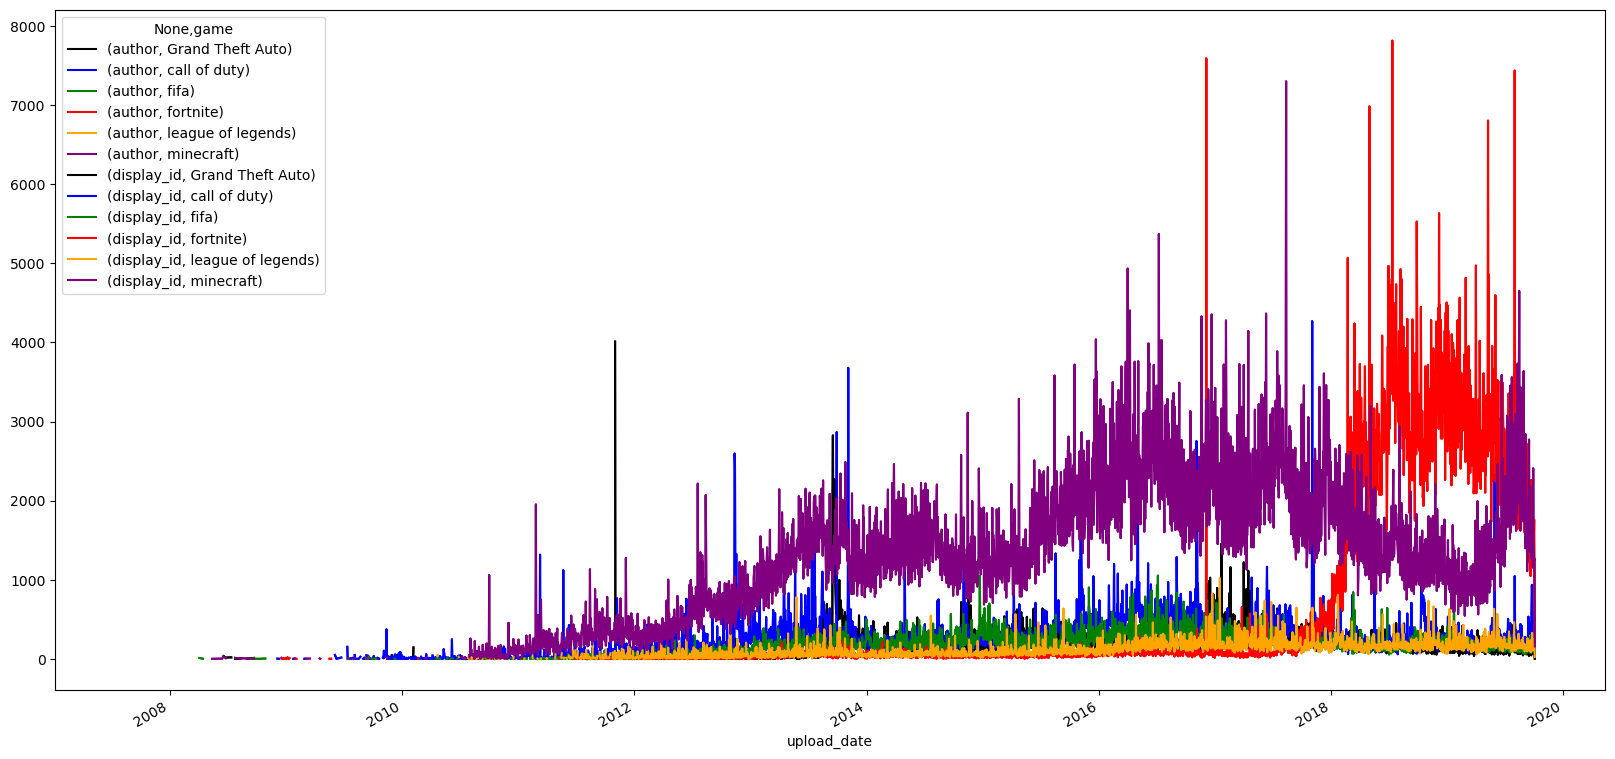

In [7]:
df['upload_date'] = pd.to_datetime(df['upload_date'])
df.groupby(['upload_date', 'game']).count().unstack().plot(figsize=(20,10), color=[colors[game] for game in frames.keys()])

In [40]:
uniqueauth = df['author'].unique()
author_dict = {author: None for author in uniqueauth}

upload_dates = df['upload_date'].unique()
dates_dict = {date: [] for date in upload_dates}

In [9]:
print(uniqueauth.shape)

(845479,)


In [54]:
authors_minecraft = {}
authors_fortnite = {}

authors_games = {game: {} for game in frames.keys()}

In [55]:
games = frames.keys()

In [56]:
for index, row in tqdm(df.iterrows()):
    # Get the tags of the current author
    author_tags = row['game']
    
    # Iterate over each tag in tags
    for tag in frames.keys():
        # Check if the current tag is in the author_tags
        if tag in author_tags:
            # Perform your desired action here
            if author_dict[row['author']] == None:
                author_dict[row['author']] = tag
            else:
                dates_dict[row['upload_date']].append((author_dict[row['author']],tag))
                author_dict[row['author']] = tag


            if row['upload_date'] > pd.Timestamp('2015-09-28 00:00:00') and row['upload_date'] <= pd.Timestamp('2017-04-23 00:00:00'): # the date where the minecraft community was the biggest
                if tag in games: 
                    if row['author'] in authors_games[tag]:
                        authors_games[tag][row['author']] += 1
                    else: 
                        authors_games[tag][row['author']] = 1
        
            if row['upload_date'] > pd.Timestamp('2017-04-23 00:00:00'): #the date where the fortnite community was the biggest
                if tag == 'fortnite':
                    if row['author'] in authors_fortnite:
                        authors_fortnite[row['author']] += 1
                    else:
                        authors_fortnite[row['author']] = 1

8813372it [02:45, 53302.33it/s]


In [92]:
import scipy.stats as stats
import numpy as np
authors_fnite = list(authors_fortnite.keys())
game_common_authors = {}
for game, authors_dict in authors_games.items():
    if game == 'fortnite':
        continue
    authors = authors_dict.keys()
    common_authors = set(authors_fnite).intersection(set(authors))
    _, p_value = stats.ttest_ind(list(authors), authors_fnite)
    game_common_authors[game] = len(common_authors)
game_names = list(game_common_authors.keys())

df = pd.DataFrame({'Game': list(game_common_authors.keys()), 'Common Authors': [count for count in game_common_authors.values()]})
import plotly.express as px

fig = px.bar(df, x='Game', y='Common Authors', text='Common Authors', title='Common Authors with Fortnite for Different Games')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(xaxis_title='Games', yaxis_title='Number of Common Authors', xaxis_tickangle=-45)

fig.write_("common_authors_plot.html")

fig.show()

In [11]:
from itertools import permutations
from collections import Counter
combs = list(permutations(list(frames.keys()), 2))

In [22]:
migrations = {}
for date in tqdm(dates_dict.keys()):
    occs = Counter(dates_dict[date])
    for combination in combs:
        if combination not in occs.keys():
            occs[combination] = 0
    date_dict = {
            'migrations': list(occs.items())
        }
    migrations[date] = date_dict

100%|██████████| 3743/3743 [00:00<00:00, 12787.05it/s]


In [13]:
import networkx as nx

In [14]:
dates_list = list(dates_dict.keys())
dates_list.sort()
selected_date = dates_list[1]
selected_date


Timestamp('2008-04-04 00:00:00')

In [16]:
print(dates_list)

[Timestamp('2007-08-16 00:00:00'), Timestamp('2008-04-04 00:00:00'), Timestamp('2008-04-15 00:00:00'), Timestamp('2008-05-14 00:00:00'), Timestamp('2008-06-14 00:00:00'), Timestamp('2008-06-19 00:00:00'), Timestamp('2008-06-26 00:00:00'), Timestamp('2008-06-29 00:00:00'), Timestamp('2008-07-13 00:00:00'), Timestamp('2008-07-20 00:00:00'), Timestamp('2008-07-25 00:00:00'), Timestamp('2008-08-05 00:00:00'), Timestamp('2008-08-15 00:00:00'), Timestamp('2008-08-23 00:00:00'), Timestamp('2008-09-01 00:00:00'), Timestamp('2008-09-16 00:00:00'), Timestamp('2008-09-22 00:00:00'), Timestamp('2008-09-23 00:00:00'), Timestamp('2008-09-26 00:00:00'), Timestamp('2008-10-11 00:00:00'), Timestamp('2008-10-28 00:00:00'), Timestamp('2008-11-03 00:00:00'), Timestamp('2008-11-18 00:00:00'), Timestamp('2008-11-19 00:00:00'), Timestamp('2008-11-30 00:00:00'), Timestamp('2008-12-05 00:00:00'), Timestamp('2008-12-11 00:00:00'), Timestamp('2008-12-15 00:00:00'), Timestamp('2008-12-18 00:00:00'), Timestamp('20

In [124]:
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import math
# Assuming 'dates_dict', 'migrations', and 'frames' are defined elsewhere in your code
# ...

dates_list = list(dates_dict.keys())
dates_list.sort()  # Sorting the list of dates


G = nx.DiGraph()
@interact(date=IntSlider(min=1200, max=len(dates_list)-1, step=1))
def plot(date):
    if date>1:
         G.remove_edges_from(list(G.edges()))
    
    
    selected_date = dates_list[date]
    m = migrations[selected_date]
    migr = m['migrations']
    # Add edges with weights
    weights = []
    num_users = {game: 0 for game in frames.keys()}
            
    for migration in migr:
        origin = migration[0][0]
        destination = migration[0][1]
        count = migration[1]
        weights.append(count)
        if (origin == 'fortnite' or destination == 'fortnite') and date < 2800:
            continue
        if origin == destination:
            num_users[origin] += count
        else: 
            if count >10:
                G.add_edge(origin, destination, weight=count)

        # Get edge weights  
    edge_weights = [weight for weight in weights]
    scaled_weights = [math.log(1 + weight)**3 for weight in edge_weights]

    # Normalize edge weights for visualization purposes
    
    min_scaled_weight = min(scaled_weights)
    max_scaled_weight = max(scaled_weights)

    normalized_weights = [2+ 7 * (scaled_weight - min_scaled_weight) / (1+max_scaled_weight - min_scaled_weight) for scaled_weight in scaled_weights]
    node_sizes = [1500+ 5 * num_users[node] for node in G.nodes]
    scaled_node_sizes = [math.log(1 + size) for size in node_sizes]
    node_colors = ['skyblue' if node == 'fortnite' else 'lightgray' for node in G.nodes()]

    # Draw the graph
    pos = nx.circular_layout(G)
    plt.figure(figsize=(15, 8))  # Increase the dimensions as needed
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=11, font_color="black", width=normalized_weights, edge_color='gray', arrowsize=20, connectionstyle="arc3,rad=0.1")

    # Show the graph
    plt.title("Migration of users between games on " + str(selected_date))
    plt.show()

interactive(children=(IntSlider(value=1200, description='date', max=3742, min=1200), Output()), _dom_classes=(…